# Pandas
The [`pandas`](https://pandas.pydata.org/) module is Python's workhorse for basic data analysis and modeling. Combined with other modules, like [`statsmodels`](http://www.statsmodels.org/stable/index.html) and [`scikit-learn`](http://scikit-learn.org/stable/), it'll cover all of your modeling needs.

## Lesson Objectives
By the end of this lesson, you will be able to:
- Construct dataframes using the `pandas` module
- Inspect data using common dataframe methods
- Filter and sort dataframes 
- Identify and handle missing values
- Create new dataframes using the split-apply-combine technique
- Join and reshape dataframes
- Create basic visualizations of your data

 - [Reading Data](#read)
 - [Inspecting Data](#inspect)
 - [Filtering and Sorting Data](#filter)
 - [Renaming, Adding and Removing Columns](#columns)
 - [Handling Missing Values](#missing)
 - [Group-By: Split-Apply-Combine](#sac)
 - [Joining Dataframes](#join)
 - [Reshaping Data](#reshape)
 - [Other Commonly Used Features](#other)
 - [Visualizations](#viz)
 - [What's Next](#next)

<a id='read'></a>
## Reading Data
Pandas has two main functions for reading text files:  [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table) and [`read_table()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html#pandas.read_table). They both convert tabular data into a `DataFrame` object. (There's also a [`read_excel()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html) function for working directly with excel files.)

In [15]:
import pandas as pd

### `read_csv()`
> `read_csv()` can accept a path to a file, a URL, or any object with a [`read()` method](https://docs.python.org/3/tutorial/inputoutput.html#methods-of-file-objects).

In [3]:
# read in a csv from a url
crop_circles = pd.read_csv('http://www.stat.ufl.edu/~winner/data/crop_circle.csv')
crop_circles.head() #use the head method to see the top 5 rows

,Year,Month,Country,Type,wheat,barley,other
0,2010,6,England,barley,0,1,0
1,2010,6,England,barley,0,1,0
2,2010,6,England,barley,0,1,0
3,2010,6,England,barley,0,1,0
4,2010,6,England,barley,0,1,0


In [4]:
#read in a local cs
filepath = r'assets/crop_circle.csv'
crop_circles = pd.read_csv(filepath)
crop_circles.head()

,Year,Month,Country,Type,wheat,barley,other
0,2010,6,England,barley,0,1,0
1,2010,6,England,barley,0,1,0
2,2010,6,England,barley,0,1,0
3,2010,6,England,barley,0,1,0
4,2010,6,England,barley,0,1,0


### `read_table()`
> `read_table()` works similarly to `read_csv()` and can accept a path to a file, a URL, or any object with a read() method.

> Note, however, that you might need to use the optional argument to specify the delimiter. The default is `\t`. 

In [5]:
crop_circles = pd.read_table('http://www.stat.ufl.edu/~winner/data/crop_circle.csv', sep = ",")
crop_circles.head() #use the head method to see the top 5 rows

,Year,Month,Country,Type,wheat,barley,other
0,2010,6,England,barley,0,1,0
1,2010,6,England,barley,0,1,0
2,2010,6,England,barley,0,1,0
3,2010,6,England,barley,0,1,0
4,2010,6,England,barley,0,1,0


In [6]:
filepath = r'assets/crop_circle.csv'
crop_circles = pd.read_csv(filepath, sep = ",")
crop_circles.head()

,Year,Month,Country,Type,wheat,barley,other
0,2010,6,England,barley,0,1,0
1,2010,6,England,barley,0,1,0
2,2010,6,England,barley,0,1,0
3,2010,6,England,barley,0,1,0
4,2010,6,England,barley,0,1,0


### Other Formats
You can read about the other IO tools within `pandas` [here](http://pandas.pydata.org/pandas-docs/stable/io.html). Note also that you can read just about anything. Here's the description of the dataset from a url:

In [7]:
for val in pd.read_table(r'http://www.stat.ufl.edu/~winner/data/crop_circle.txt').values:
    for v in val:
        print(v)

Source www.cropcirclesonline.com
Description: Reported crop circles for 9 countries between 2004-2010.
Variables (labels)
Year   (Year)
Month of Year   (Month)
Country      (Country)
Field Type    (Type)
wheat indicator   (wheat)
barley indicator  (barley)
other indicator   (other) 


<a id='inspect'></a>
## Inspecting Data
You've already seen the `head()` method, which displays the top 5 rows by default. Here are a few of the more common methods and attributes for quickly inspecting your dataset.

### `tail()`
> Print the last 5 rows. The optional argument can increase or decrease the number of rows displayed.

In [12]:
crop_circles.tail()

,Year,Month,Country,Type,wheat,barley,other
858,2004,7,Czech,wheat,1,0,0
859,2004,7,Czech,wheat,1,0,0
860,2004,7,Czech,wheat,1,0,0
861,2004,7,Czech,wheat,1,0,0
862,2004,7,Czech,wheat,1,0,0


### `[ : ]`
> Index a dataframe by row

In [8]:
crop_circles[:5]      #first 5 rows

,Year,Month,Country,Type,wheat,barley,other
0,2010,6,England,barley,0,1,0
1,2010,6,England,barley,0,1,0
2,2010,6,England,barley,0,1,0
3,2010,6,England,barley,0,1,0
4,2010,6,England,barley,0,1,0


### `columns`
> Show the column names. Note that this attribute returns a special pandas object called `pandas.indexes.base.Index`. What's nice about this object is that it is iterable.

In [9]:
crop_circles.columns

Index(['Year', 'Month', 'Country', 'Type', 'wheat', 'barley', 'other'], dtype='object')

In [10]:
type(crop_circles.columns)

pandas.indexes.base.Index

In [11]:
for col in crop_circles.columns:
    print(col)

Year
Month
Country
Type
wheat
barley
other


### `dtypes`
> Show the [data type](http://pandas.pydata.org/pandas-docs/stable/basics.html#dtypes) of each column:

In [22]:
crop_circles.dtypes

Year        int64
Month       int64
Country    object
Type       object
wheat       int64
barley      int64
other       int64
dtype: object

### `shape`
> Return a tuple with the number of rows and columns

In [25]:
crop_circles.shape

(863, 7)

### `info()`
> Return a concise summary of the object, including memory information

In [28]:
crop_circles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 7 columns):
Year       863 non-null int64
Month      863 non-null int64
Country    863 non-null object
Type       863 non-null object
wheat      863 non-null int64
barley     863 non-null int64
other      863 non-null int64
dtypes: int64(5), object(2)
memory usage: 47.3+ KB


### `describe()`
> Describe all of the numeric columns

In [29]:
crop_circles.describe()

,Year,Month,wheat,barley,other
count,863.000000,863.000000,863.000000,863.000000,863.000000
mean,2006.822711,6.690614,0.655852,0.117034,0.227115
std,1.981900,1.271859,0.475365,0.321647,0.419210
min,2004.000000,1.000000,0.000000,0.000000,0.000000
25%,2005.000000,6.000000,0.000000,0.000000,0.000000
50%,2007.000000,7.000000,1.000000,0.000000,0.000000
75%,2008.000000,7.000000,1.000000,0.000000,0.000000
max,2010.000000,12.000000,1.000000,1.000000,1.000000


> You can use the optional `include` argument to choose the dtypes you want to describe:

In [30]:
crop_circles.describe(include = ['object'])

,Country,Type
count,863,863
unique,9,21
top,England,wheat
freq,431,566


In [32]:
crop_circles.describe(include = 'all')

,Year,Month,Country,Type,wheat,barley,other
count,863.000000,863.000000,863,863,863.000000,863.000000,863.000000
unique,NaN,NaN,9,21,NaN,NaN,NaN
top,NaN,NaN,England,wheat,NaN,NaN,NaN
freq,NaN,NaN,431,566,NaN,NaN,NaN
mean,2006.822711,6.690614,NaN,NaN,0.655852,0.117034,0.227115
std,1.981900,1.271859,NaN,NaN,0.475365,0.321647,0.419210
min,2004.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,2005.000000,6.000000,NaN,NaN,0.000000,0.000000,0.000000
50%,2007.000000,7.000000,NaN,NaN,1.000000,0.000000,0.000000
75%,2008.000000,7.000000,NaN,NaN,1.000000,0.000000,0.000000


> Or you could call some of those summary statistics individually:

In [95]:
crop_circles.mean()

Year      2006.822711
Month        6.690614
wheat        0.655852
barley       0.117034
other        0.227115
dtype: float64

In [96]:
crop_circles.max()

Year        2010
Month         12
Country      USA
Type       wheat
wheat          1
barley         1
other          1
dtype: object

In [98]:
crop_circles.min()

Year          2004
Month            1
Country    Belgium
Type       alfalfa
wheat            0
barley           0
other            0
dtype: object

In [99]:
crop_circles.std()

Year      1.981900
Month     1.271859
wheat     0.475365
barley    0.321647
other     0.419210
dtype: float64

<a id='filter'></a>
## Filtering and Sorting Data

### Selecting Columns
You can select columns as an attribute of the dataframe or as key:

In [12]:
crop_circles.Year  #select as an attribute

0      2010
1      2010
2      2010
3      2010
4      2010
5      2010
6      2009
7      2009
8      2009
9      2009
10     2009
11     2009
12     2009
13     2009
14     2009
15     2009
16     2009
17     2009
18     2008
19     2008
20     2008
21     2008
22     2008
23     2008
24     2008
25     2008
26     2008
27     2007
28     2007
29     2007
       ... 
833    2007
834    2007
835    2007
836    2007
837    2007
838    2006
839    2006
840    2005
841    2004
842    2004
843    2004
844    2004
845    2004
846    2004
847    2004
848    2004
849    2010
850    2010
851    2008
852    2007
853    2006
854    2004
855    2004
856    2004
857    2004
858    2004
859    2004
860    2004
861    2004
862    2004
Name: Year, dtype: int64

In [37]:
crop_circles['Year'] #select as a key

0      2010
1      2010
2      2010
3      2010
4      2010
5      2010
6      2009
7      2009
8      2009
9      2009
10     2009
11     2009
12     2009
13     2009
14     2009
15     2009
16     2009
17     2009
18     2008
19     2008
20     2008
21     2008
22     2008
23     2008
24     2008
25     2008
26     2008
27     2007
28     2007
29     2007
       ... 
833    2007
834    2007
835    2007
836    2007
837    2007
838    2006
839    2006
840    2005
841    2004
842    2004
843    2004
844    2004
845    2004
846    2004
847    2004
848    2004
849    2010
850    2010
851    2008
852    2007
853    2006
854    2004
855    2004
856    2004
857    2004
858    2004
859    2004
860    2004
861    2004
862    2004
Name: Year, dtype: int64

> Note that the type of the returned object is a pandas `Series`

In [38]:
type(crop_circles['Year'])

pandas.core.series.Series

> Also note that you can call many of the summary DataFrame methods on a `Series`:

In [39]:
crop_circles['Year'].describe()

count     863.000000
mean     2006.822711
std         1.981900
min      2004.000000
25%      2005.000000
50%      2007.000000
75%      2008.000000
max      2010.000000
Name: Year, dtype: float64

In [40]:
crop_circles['Year'].shape

(863,)

In [41]:
crop_circles['Year'].head(3)

0    2010
1    2010
2    2010
Name: Year, dtype: int64

#### Selecting Multiple Columns
> You can select multiple columns by using a list of column names as a key:

In [45]:
crop_circles[['Year', 'Month']].head()

,Year,Month
0,2010,6
1,2010,6
2,2010,6
3,2010,6
4,2010,6


> This means you can pass a list object in as a key:

In [13]:
year_month = ['Year', 'Month']
crop_circles[year_month].head()

,Year,Month
0,2010,6
1,2010,6
2,2010,6
3,2010,6
4,2010,6


### Series Methods
> #### `value.counts()`
> A pandas `Series` supports a handy method for quickly summarizing categorical variables. The resulting object will be in descending order so that the first element is the most frequently-occurring element. It excludes NA values by default.

In [102]:
crop_circles['Year'].value_counts()

2007    150
2004    142
2005    137
2008    128
2010    107
2006    100
2009     99
Name: Year, dtype: int64

In [103]:
crop_circles['Year'].min()

2004

> #### `unique()`
> Return the unique values from a `Series`

In [63]:
crop_circles['Country'].unique()

array(['England', 'Germany', 'Italy', 'USA', 'Canada', 'Holland', 'Swiss',
       'Belgium', 'Czech'], dtype=object)

### Filtering Data
You can filter a `pandas` dataframe using the `query()` method or by indexing with boolean expressions.

> #### `query()`
> Query the columns of a dataframe with a boolean expression.

In [70]:
crop_circles.query("Country == 'Swiss'").head()

,Year,Month,Country,Type,wheat,barley,other
791,2007,5,Swiss,barley,0,1,0
792,2005,7,Swiss,barley,0,1,0
793,2005,7,Swiss,barley,0,1,0
794,2005,7,Swiss,barley,0,1,0
795,2005,7,Swiss,oats,0,0,1


> #### Indexing with Boolean Expressions
> Instead of using the query method, which can get clunky quite quickly, you can index the dataframe by key and add a boolean expression.

In [71]:
crop_circles[crop_circles['Country'] == 'Swiss'].head()

,Year,Month,Country,Type,wheat,barley,other
791,2007,5,Swiss,barley,0,1,0
792,2005,7,Swiss,barley,0,1,0
793,2005,7,Swiss,barley,0,1,0
794,2005,7,Swiss,barley,0,1,0
795,2005,7,Swiss,oats,0,0,1


> To see how this works, run the boolean portion of the code. Note how it returns the Country column with `True` or `False` in place of the values based on the condition you supplied in the boolean expression. 

In [72]:
[crop_circles['Country'] == 'Swiss']

[0      False
 1      False
 2      False
 3      False
 4      False
 5      False
 6      False
 7      False
 8      False
 9      False
 10     False
 11     False
 12     False
 13     False
 14     False
 15     False
 16     False
 17     False
 18     False
 19     False
 20     False
 21     False
 22     False
 23     False
 24     False
 25     False
 26     False
 27     False
 28     False
 29     False
        ...  
 833    False
 834    False
 835    False
 836    False
 837    False
 838    False
 839    False
 840    False
 841    False
 842    False
 843    False
 844    False
 845    False
 846    False
 847    False
 848    False
 849    False
 850    False
 851    False
 852    False
 853    False
 854    False
 855    False
 856    False
 857    False
 858    False
 859    False
 860    False
 861    False
 862    False
 Name: Country, dtype: bool]

> When you pass that boolean Series as an index to the dataframe, all of the `True` rows get returned.

> And since you can chain together multiple booleans using the and (`&`) and/or or (`|`) operators, you can create quite complicated filters for your dataframe.

In [85]:
crop_circles[(crop_circles['Country'] == 'Swiss') |
            (crop_circles['Country'] == 'Italy')].head() #return rows where country is Swiss or Italy

,Year,Month,Country,Type,wheat,barley,other
568,2006,6,Italy,alfalfa,0,0,1
569,2009,6,Italy,barley,0,1,0
570,2009,6,Italy,barley,0,1,0
571,2009,5,Italy,barley,0,1,0
572,2008,4,Italy,barley,0,1,0


> If you have a lot of `or` conditions, you can use the `isin()` method:

In [86]:
crop_circles[crop_circles.Country.isin(['Swiss', 'Italy'])].head()

,Year,Month,Country,Type,wheat,barley,other
568,2006,6,Italy,alfalfa,0,0,1
569,2009,6,Italy,barley,0,1,0
570,2009,6,Italy,barley,0,1,0
571,2009,5,Italy,barley,0,1,0
572,2008,4,Italy,barley,0,1,0


> But if it's a really complicated filter, just chain everything together

In [76]:
crop_circles[((crop_circles['Country'] == 'Swiss') |
              (crop_circles['Country'] == 'Italy'))&
              (crop_circles['barley'] == 1)&
              (crop_circles['Year'] > 2007)] #return rows where country is Swiss or Italy, barley = 1, and Year is > 2007

,Year,Month,Country,Type,wheat,barley,other
569,2009,6,Italy,barley,0,1,0
570,2009,6,Italy,barley,0,1,0
571,2009,5,Italy,barley,0,1,0
572,2008,4,Italy,barley,0,1,0
578,2010,5,Italy,barley,0,1,0
579,2008,6,Italy,barley,0,1,0
580,2008,6,Italy,barley,0,1,0
581,2008,6,Italy,barley,0,1,0
582,2008,6,Italy,barley,0,1,0


> Once you've filtered your data, it's also possible to access one or more columns.

In [79]:
filtered_df = crop_circles[((crop_circles['Country'] == 'Swiss') |
                            (crop_circles['Country'] == 'Italy'))&
                            (crop_circles['barley'] == 1)&
                            (crop_circles['Year'] > 2007)]

filtered_df.Month #access the Month column

569    6
570    6
571    5
572    4
578    5
579    6
580    6
581    6
582    6
Name: Month, dtype: int64

> You can continue to drill down using the methods you've used abvoe: 

In [81]:
filtered_df.Month.value_counts()

6    6
5    2
4    1
Name: Month, dtype: int64

### Sorting Data

In [89]:
crop_circles.sort_values('Year')

,Year,Month,Country,Type,wheat,barley,other
862,2004,7,Czech,wheat,1,0,0
409,2004,7,England,wheat,1,0,0
410,2004,7,England,wheat,1,0,0
411,2004,7,England,wheat,1,0,0
412,2004,7,England,wheat,1,0,0
413,2004,7,England,wheat,1,0,0
414,2004,7,England,wheat,1,0,0
415,2004,7,England,wheat,1,0,0
416,2004,7,England,wheat,1,0,0
417,2004,7,England,wheat,1,0,0


In [91]:
crop_circles.sort_values('Year', ascending=False) #optional argument for ascending order

,Year,Month,Country,Type,wheat,barley,other
0,2010,6,England,barley,0,1,0
131,2010,7,England,wheat,1,0,0
133,2010,7,England,wheat,1,0,0
134,2010,7,England,wheat,1,0,0
135,2010,7,England,wheat,1,0,0
136,2010,7,England,wheat,1,0,0
137,2010,7,England,wheat,1,0,0
138,2010,7,England,wheat,1,0,0
139,2010,7,England,wheat,1,0,0
140,2010,7,England,wheat,1,0,0


In [93]:
crop_circles.sort_values(['Year', 'Month']) #sort multiple columns

,Year,Month,Country,Type,wheat,barley,other
471,2004,4,Germany,rape,0,0,1
44,2004,5,England,barley,0,1,0
45,2004,5,England,barley,0,1,0
103,2004,5,England,rape,0,0,1
104,2004,5,England,rape,0,0,1
105,2004,5,England,rape,0,0,1
106,2004,5,England,rape,0,0,1
107,2004,5,England,rape,0,0,1
427,2004,5,England,wheat,1,0,0
444,2004,5,Germany,barley,0,1,0


### Exercise
#### 1) Read in titanic.csv as a DataFrame object named `titanic`. The file is in the assets folder of your working directory.

You can find a description of the dataset [here](https://www.kaggle.com/c/titanic/data).

#### 2) Print the head and the tail

#### 3) Print the Survived column

#### 4) Count the number of observations for each Sex

#### 5) What is the average Fare?

#### 6) What is the average Fare where Pclass `==` 1?

#### 7) Which five people paid the highest fares but didn't survive?

<a id='columns'></a>
## Renaming, Adding, and Removing Columns

> You can rename one or more columns in a variety of ways:

In [110]:
titanic.columns #print the current names of the columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [113]:
new_cols = ['Id', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp','Parch', 'Tix',
            'Fare', 'Cabin', 'Embarked']

titanic.columns = new_cols
titanic.rename(columns={'Id':'PassengerID', 'Tix':'Ticket'}, inplace=True)

> You can add new columns as a function of existing ones

In [115]:
titanic['AgeInDays'] = titanic['Age'] * 365

> You can remove columns in a variety of ways

In [ ]:
titanic.drop('AgeInDays', axis=1)                       # axis=0 for rows, 1 for columns
titanic.drop('AgeInDays', axis=1 , inplace=True)        # make the drop permanent

<a id='missing'></a>
## Handling Missing Values
Missing values are usually excluded by default when operating on a dataframe:

In [120]:
titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [121]:
titanic.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

You can find missing values using `isnull()` and `notnull()`:

In [125]:
titanic.Embarked.isnull() #True if missing
titanic.Embarked.isnull().sum() #sum the missing values
titanic.Embarked.notnull().sum() #sum the non-missing values

889

In [128]:
titanic[titanic.Embarked.isnull()] # show the rows where Embarked is missing

,PassengerID,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeInDays
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,13870.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,22630.0


You can drop missing values with `dropna()`:

In [129]:
titanic.dropna() # drop a row if ANY values are missing

,PassengerID,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeInDays
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,13870.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,12775.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,19710.0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,1460.0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,21170.0
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,12410.0
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,10220.0
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,6935.0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,17885.0
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C,23725.0


In [ ]:
titanic.dropna(how='all')    # drop a row only if ALL column values are missing

You can also fill missing values:

In [ ]:
titanic.Embarked.fillna(value='S')                 # fill in missing values with 'S'

<a id='sac'></a>
## Group-By:  Split-Apply-Combine
The term "Group By" should be familiar to those familiar with SQL. With `pandas`, the process involves one or more of the following steps:
- **Splitting** the data into groups based on some criteria
- **Applying** a function to each group independently
    - Aggregation
        - computing group means
        - computing group sizes
    - Transformation
        - standardizing data with z-scores
        - conditionally filling NAs
    - Filtration
        - discarding data
- **Combining** the results into a data structure

We can use the `groupby()` method to achieve this with `pandas`.

As an example, pretend that you want to split a dataset into groups based on some categorical variable $x$ and then calculate the mean of some variable $y$ for each group, saving the result as a new dataframe. Here's diagram of that process:
<img src='assets/sac.png'>

Let's do that with our titanic dataset, splitting the $Pclass$ variable and applying the mean function to the $Fare$ variable.

In [133]:
titanic.groupby('Pclass').Fare.mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

We applied the mean above, but we can use just about any function, including `describe()`:

In [135]:
titanic.groupby('Pclass').Fare.describe()

Pclass       
1       count    216.000000
        mean      84.154687
        std       78.380373
        min        0.000000
        25%       30.923950
        50%       60.287500
        75%       93.500000
        max      512.329200
2       count    184.000000
        mean      20.662183
        std       13.417399
        min        0.000000
        25%       13.000000
        50%       14.250000
        75%       26.000000
        max       73.500000
3       count    491.000000
        mean      13.675550
        std       11.778142
        min        0.000000
        25%        7.750000
        50%        8.050000
        75%       15.500000
        max       69.550000
Name: Fare, dtype: float64

You can even specify the aggregation functions you want to use:

In [137]:
titanic.groupby('Pclass').Fare.agg(['count', 'mean', 'min', 'max'])

,count,mean,min,max
Pclass,,,,
1,216,84.154687,0.0,512.3292
2,184,20.662183,0.0,73.5000
3,491,13.675550,0.0,69.5500


<a id='join'></a>
## Joining Dataframes
You can combine columns from one or more tables in a **relational database** using the `merge()` module of the `pandas` library. 
- A relational database organizes data into one or more tables (or "relations") of columns and rows, **with a unique key identifying each row.** 

Take two datsets that share a common key as an example. You can join them multiple ways. Consider the following diagram:
<img src='assets/join.png'>

We'll work through this with two datasets: movies.csv and ratings.csv. Here's a breakout of each dataset's columns.
- movies.csv
    - movie_id
    - title
- ratings.csv
    - user_id
    - movie_id
    - rating
    - timestamp
    
Note how they share the `movie_id` column. That's going to be our common key.

In [143]:
movies = pd.read_csv(r'assets/movies.csv')
ratings = pd.read_csv(r'assets/ratings.csv')

Let's join 'movies' and 'ratings' using a natural (aka inner) join on 'movie_id'

In [170]:
# merge 'movies' and 'ratings' (natural aka inner join on 'movie_id')
movie_ratings = pd.merge(movies, ratings, on='movie_id') #how='inner' is the default argument
movie_ratings.head()

,movie_id,title,user_id,rating,timestamp
0,1,Toy Story (1995),308,4,887736532
1,1,Toy Story (1995),287,5,875334088
2,1,Toy Story (1995),148,4,877019411
3,1,Toy Story (1995),280,4,891700426
4,1,Toy Story (1995),66,3,883601324


In [150]:
print("movies had {} rows.\nratings had {} rows.\nmovie_ratings has {} rows".format(movies.shape[0],
                                                                                    ratings.shape[0],
                                                                                    movie_ratings.shape[0]))

movies had 1682 rows.
ratings had 100000 rows.
movie_ratings has 100000 rows


By looking at row counts after the merge, we can see that we retained all of the ratings from the merge. In other words, each movie in the ratings dataset had a movie_id that also existed in the movies dataset.

<a id='reshape'></a>
## Reshaping Data
You might have heard that something like 80% of data science is cleaning data. Depending on your field, that's an understatement. In order to make analyses as easy and effective as possible, most visualization tools and statisitical packages expect data to be in what's known as a **tidy** format. Tidy datasets have a specific structure:
- Each **variable** is a column
- Each **observation** is a row 
- Each type of observational unit is a table. 

<img src='assets/tidy_data.png'>

There's an excellent [2014 paper](http://vita.had.co.nz/papers/tidy-data.pdf) by Hadley Wickham that addresses the issue of tidy data in R. In it, you'll encounter five of the most common types of *messy* datasets:
 - Column headers are values, not variable names.
 - **Multiple variables are stored in one column.**
 - Variables are stored in both rows and columns.
 - Multiple types of observational units are stored in the same table.
 - A single observational unit is stored in multiple tables.

We'll address the instance where multiple variables are stored in one column to demonstrate the [reshaping tools](https://pandas.pydata.org/pandas-docs/stable/reshaping.html) of the `pandas` module. First, let's create the dataframe:

In [221]:
import pandas.util.testing as tm; tm.N = 3
import numpy as np
def unpivot(frame):
    N, K = frame.shape
    data = {'value' : frame.values.ravel('F'),
            'variable' : np.asarray(frame.columns).repeat(N),
            'date' : np.tile(np.asarray(frame.index), K)}
    return pd.DataFrame(data, columns=['date', 'variable', 'value'])
df = unpivot(tm.makeTimeDataFrame())

df

,date,variable,value
0,2000-01-03,A,-0.263325
1,2000-01-04,A,-1.375401
2,2000-01-05,A,0.379112
3,2000-01-03,B,-0.184251
4,2000-01-04,B,-0.197979
5,2000-01-05,B,-2.282509
6,2000-01-03,C,-0.700665
7,2000-01-04,C,1.351647
8,2000-01-05,C,1.552811
9,2000-01-03,D,1.474730


Note that the `variable` column contains multiple variables (A, B, C, and D) within the same column. In order to be tidy, these need be broken out into their own columns. We can do that with the `pivot()` method:

In [229]:
pivot = df.pivot(index='date', columns='variable', values='value')
pivot

variable,A,B,C,D
date,,,,
2000-01-03,-0.263325,-0.184251,-0.700665,1.474730
2000-01-04,-1.375401,-0.197979,1.351647,0.368386
2000-01-05,0.379112,-2.282509,1.552811,-1.419122


<a id='other'></a>
## Other Commonly Used Features

In [153]:
# map existing values to a different set of values
titanic['is_male'] = titanic.Sex.map({'female':0, 'male':1})

In [156]:
# replace all instances of a value in a column
titanic.Sex.replace('male', 'M',inplace = True)

In [ ]:
# access string methods with 'str'
titanic.Sex.str.upper()                               # converts to uppercase

In [165]:
titanic.Name.str.contains('Allen')        #checks for a substring, returning boolean array
titanic[titanic['Name'].str.contains("Allen")]

,PassengerID,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeInDays,is_male
4,5,0,3,"Allen, Mr. William Henry",M,35.0,0,0,373450,8.0500,NaN,S,12775.0,1
730,731,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,10585.0,0


In [194]:
# convert a string to the datetime format with a user-defined function that's applied using lambda
import datetime
def convert_unix_timestamp(time):
    return datetime.datetime.fromtimestamp(int(time)).strftime('%Y-%m-%d %H:%M:%S')
      
movie_ratings['Time'] = movie_ratings['timestamp'].apply(lambda x: convert_unix_timestamp(x))

In [195]:
# setting and then removing an index
titanic.set_index('PassengerID', inplace=True)
titanic.reset_index(inplace=True)

In [ ]:
# change the data type of a column
titanic['Ticket'] = titanic.Ticket.astype('float')

In [201]:
# create dummy variables for 'continent' and exclude first dummy column
titanic_dummies = pd.get_dummies(titanic.Embarked, prefix='embark')
titanic_with_dummies = pd.concat([titanic,titanic_dummies], axis = 1) #then concatenate the dataframes
titanic_with_dummies.head(1)

,PassengerID,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeInDays,is_male,embark_C,embark_Q,embark_S
0,1,0,3,"Braund, Mr. Owen Harris",M,22.0,1,0,A/5 21171,7.25,NaN,S,8030.0,1,0,0,1


In [202]:
# detecting duplicate rows
titanic.duplicated()            # True if a row is identical to a previous row

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
861    False
862    False
863    False
864    False
865    False
866    False
867    False
868    False
869    False
870    False
871    False
872    False
873    False
874    False
875    False
876    False
877    False
878    False
879    False
880    False
881    False
882    False
883    False
884    False
885    False
886    False
887    False
888    False
889    False
890    False
dtype: bool

In [203]:
titanic[titanic.duplicated()]   # only show duplicates

,PassengerID,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeInDays,is_male


In [204]:
titanic.duplicated().sum()      # count of duplicates

0

In [ ]:
titanic.drop_duplicates()       # drop duplicate rows

In [205]:
titanic.Name.duplicated()       # check a single column for duplicates

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
861    False
862    False
863    False
864    False
865    False
866    False
867    False
868    False
869    False
870    False
871    False
872    False
873    False
874    False
875    False
876    False
877    False
878    False
879    False
880    False
881    False
882    False
883    False
884    False
885    False
886    False
887    False
888    False
889    False
890    False
Name: Name, dtype: bool

In [206]:
titanic.duplicated(['Name', 'Sex', 'Age']).sum()   #check for duplicates across multiple columns

0

In [210]:
titanic.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [211]:
# convert a numeric variable to categorical based on value ranges
titanic['Fare_Cat'] = 'cheap'                                                           # initialize col with 'young'
titanic.loc[titanic.Fare.between(0, 30), 'Fare_Cat'] = 'cheap'                          # change 0-30 to 'cheap'
titanic.loc[titanic.Fare.between(30, 200, inclusive = False), 'Fare_Cat'] = 'fair'       # 30-200 to fair
titanic.loc[titanic.Fare.between(200, 513, inclusive = False), 'Fare_Cat'] = 'expensive!'# change rest to expensive! 

In [ ]:
# write a DataFrame to csv
titanic.to_csv('titanic_updated.csv')                 # index is the first column
titanic.to_csv('titanic_updated.csv', index=False)    # ignore the index

In [214]:
# create a DataFrame from a dictionary
pd.DataFrame({'capital':['Addis Ababa', 'Berlin', 'Ulaanbaatar'], 'state':['Ethiopia', 'Germany', 'Mongolia']})

,capital,state
0,Addis Ababa,Ethiopia
1,Berlin,Germany
2,Ulaanbaatar,Mongolia


In [215]:
# create a DataFrame from a list of lists
pd.DataFrame([['Addis Ababa', 'Ethiopia'], ['Berlin', 'Germany'], ['Ulaanbaatar', 'Mongolia']], 
             columns=['capital', 'state'])

,capital,state
0,Addis Ababa,Ethiopia
1,Berlin,Germany
2,Ulaanbaatar,Mongolia


<a id='viz'></a>
## Visualizations

The `pandas` and  `matplotlib` modules make it easy to plot your data. I couldn't possibly hope to cover everything here, so see this [extensive tutorial] (https://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization) if you want to. And if you're pressed for time, see this [cookbook](https://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook-plotting).

#### Visualization Example
An [Andrews Curve](https://en.wikipedia.org/wiki/Andrews_plot) allows you to visualize data clustering. Curves belonging to observations of the same class will usually be closer together, thereby forming larger structures. Below, we use an Andrews Curve to help us categorize the species of iris flowers based their petal and sepal measurements using the [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) - a canonical machine learning dataset.

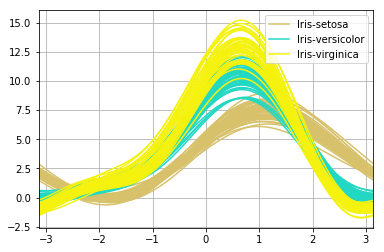

In [254]:
from pandas.tools.plotting import andrews_curves

data = pd.read_csv(r'https://raw.githubusercontent.com/pandas-dev/pandas/master/pandas/tests/data/iris.csv')

andrews_curves(data, 'Name')

As you can see, the only bit of code we needed to produce this plot was `andrews_curves(data, 'Name')`. That worked right out of the box because our data was tidy.

## Exercises
For these exercises, you'll work with a dataset on international drinking habits. Import it with the code below.

In [16]:
drinks = pd.read_csv('assets/drinks.csv')

> 1) How many rows are there?

> 2) How many nulls are there? 

> 3) There seems to be a lot of nulls in the `continent` column given the number of rows. Might that have something to do with the fact that North America was coded as 'NA' for the `continent` column? (Hint: it does.) Re-import the data using the optional `keep_default_na` argument so that Python doesn't automatically recognized `NA` as a missing value. 

> 4) Rename the columns to using this list:  `['country', 'beer', 'spirits', 'wine', 'alcohol', 'continent']`

> 5) Which continent drinks the least amount of wine?

> 6) How many more **milliliters** of pure alcohol does the highest-consuming European country consume than the mean pure alcohol consumption of Africa?

> 7) Reshape `drinks` so that the type-of-drink columns become one column. In other words, [melt](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html) the data so that it is long instead of wide. 